In [1]:
include("common.jl")
using PSet1Common

In [2]:
n = 4
xs2 = Float64[cos((2j - 1) * π / (2 * n)) for j in 1:n];

In [3]:
f2(x) = exp(4x) + exp(-2x)

f2 (generic function with 1 method)

In [4]:
ys2 = Float64[f2(x) for x in xs2];

In [5]:
lagrange_res2 = solve_interpolation(LagrangeBase(xs2), xs2, ys2)

PSet1Common.InterpolationResult{PSet1Common.LagrangeBase{Float64},Array{Float64,1}}(PSet1Common.LagrangeBase{Float64}([0.9238795325112867,0.38268343236508984,-0.3826834323650897,-0.9238795325112867],[-1.3065629648763764,0.5411961001461969,-0.541196100146197,1.3065629648763766]),[-40.42402035106509,-5.086729805787928,-2.366159756520988,-6.3704181202843815])

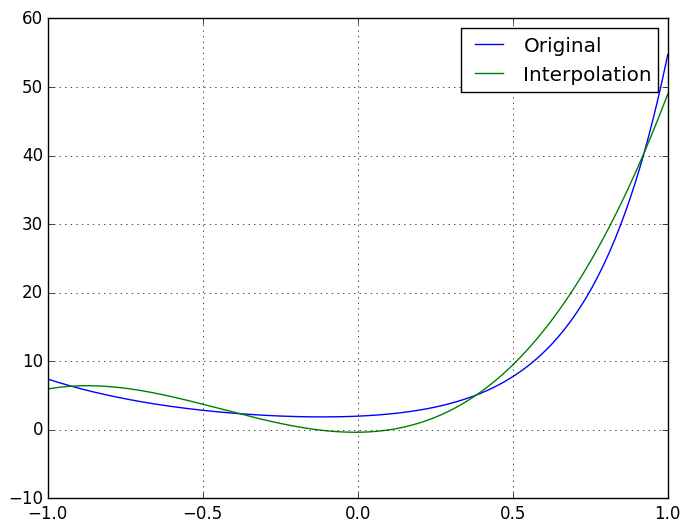

In [6]:
xs_plot2 = linspace(-1, 1, 1000)
interp_ys2 = lagrange_res2(xs_plot2)
orig_ys2 = f2(xs_plot2)

plot(xs_plot2, orig_ys2, label="Original")
plot(xs_plot2, interp_ys2, label="Interpolation")
legend()
grid()

* Norm of $f-p_3$

In [7]:
diff_ys = abs(interp_ys2 - orig_ys2)
norm_inf = maximum(diff_ys)

5.75190850271796

Maximum of $\displaystyle\frac{f^{(n)}(\theta)}{n!}\prod_{j=1}^n(x-x_j)$ is

$$\frac{4^n e^4 + (-2)^n e^{-2}}{n!}\prod_{j=1}^n2\sin^2\frac{(2j - 1)\pi}{4n}$$

To find a interpolation with smaller maximum difference, we can plot the difference.

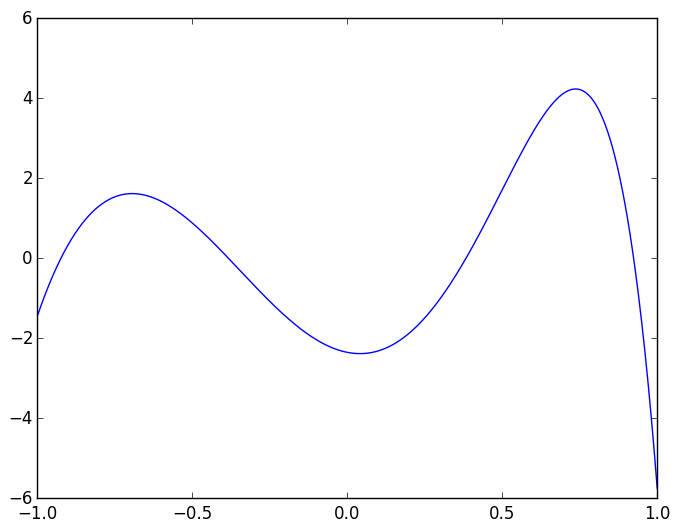

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c5b93bc88>

In [8]:
plot(xs_plot2, interp_ys2 - orig_ys2)

Notice that the maximum difference is at $1.0$ we can decrease it by increasing the coefficient for the $x^3$ term

In [9]:
mono_res2 = solve_interpolation(MonomialBase(), xs2, ys2)

PSet1Common.InterpolationResult{PSet1Common.MonomialBase,Array{Float64,1}}(PSet1Common.MonomialBase(),[-0.34750599956780803,0.4738659956865233,27.818676015964808,21.036540801579385])

In [10]:
mono_coeff = mono_res2.coeff

4-element Array{Float64,1}:
 -0.347506
  0.473866
 27.8187  
 21.0365  

In [11]:
ys_fitres = Float64[@evalpoly(x, mono_coeff[1], mono_coeff[2],
                              mono_coeff[3], mono_coeff[4] + 1) for x in xs_plot2];

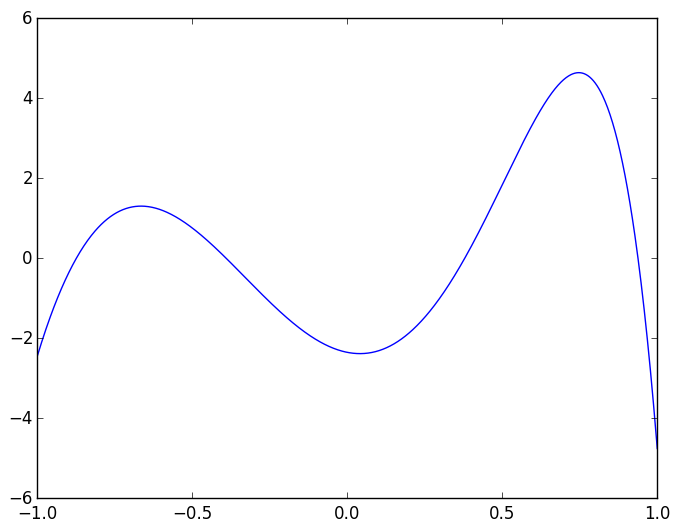

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c5b81e518>

In [12]:
plot(xs_plot2, ys_fitres - orig_ys2, label="Interpolation")

In [13]:
diff_ys2 = abs(orig_ys2 - ys_fitres)
norm_inf2 = maximum(diff_ys2)

4.751908502717946